In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm  # Use CenteredNorm for newer matplotlib versions
from matplotlib.cm import ScalarMappable
import matplotlib.colors

In [31]:
matplotlib.rc('font', family='Arial') 

In [284]:
# Create a new figure with custom subplot layout
start_year, middle_year1,middle_year2, end_year=2003, 2011, 2011, 2019
fig = plt.figure(figsize=(23, 11), dpi=500)

# Create grid specification for subplots
gs = fig.add_gridspec(21, 50)

ax1 = fig.add_subplot(gs[:12, 0:22])
subax1=fig.add_subplot(gs[2:10, 22])
ax1.text(-0.05, 1.05, 'A', transform=ax1.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')

ax2 = fig.add_subplot(gs[:12, 25:47])
subax2 = fig.add_subplot(gs[2:10, 47])
ax2.text(-0.05, 1.05, 'B', transform=ax2.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')
plotAB(ax1, ax2, subax1, subax2 , start_year, middle_year1,middle_year2, end_year)
ax3 = fig.add_subplot(gs[12:, 0:10])
ax31 = fig.add_subplot(gs[12:, 10])
ax3.text(-0.05, 1.1, 'C', transform=ax3.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')

ax4 = fig.add_subplot(gs[12:, 13:23])
ax41 = fig.add_subplot(gs[12:, 23])
ax4.text(-0.05, 1.1, 'D', transform=ax4.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')


ax5 = fig.add_subplot(gs[12:, 26:36])
ax51 = fig.add_subplot(gs[12:, 36])

ax5.text(-0.05, 1.1, 'E', transform=ax5.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')



ax6 = fig.add_subplot(gs[12:, 39:49])
ax61 = fig.add_subplot(gs[12:, 49])
ax6.text(-0.05, 1.1, 'F', transform=ax6.transAxes, verticalalignment='top', fontsize=25,fontweight='bold')


Results=CDEF([ax3,ax4,ax5,ax6], start_year, middle_year1,middle_year2, end_year)

plot_subsub([ax31,ax41, ax51, ax61], Results)
# Adjust the layout manually
fig.subplots_adjust(left=0.05, right=0.95, top=1, bottom=0.1, hspace=0.1, wspace=0.3)#plt.tight_layout()
#fig.savefig('Final Figure2-ver3.pdf')

C:\Users\Yasaman\AppData\Local\Temp\ipykernel_57392\265098999.py:134: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Yasaman\AppData\Local\Temp\ipykernel_57392\265098999.py:185: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Yasaman\AppData\Local\Temp\ipykernel_57392\1649085844.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will bec

In [7]:
def plot_subsub(axis, Results):
    for ax, res in zip(axis, Results):
        # Create DataFrame
        df = res.reset_index()
        # Set index to country names for better plotting
        df.set_index('Aff_country', inplace=True)
        norm = matplotlib.colors.LogNorm()  # Normalization for the colormap
        sns.heatmap(df[['sum']], annot=True, fmt=".1f", cmap='viridis', cbar=False, norm=norm, ax=ax)
        ax.set_title('sum')
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')

In [283]:
def plotAB(ax3, ax4, subax3, subax4, start_year, middle_year1,middle_year2, end_year):  
    # -----------------------------------------
    # 1) Read and preprocess main DataFrame
    # -----------------------------------------
    df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")

    # Rename columns in a single step
    df.rename(
        columns={
            'year': 'Year',
            'aggregated_value': 'count',
            'country': 'Mention_country',
            'affiliation_country': 'Aff_country'
        },
        inplace=True
    )

    # Define dictionary for countries and get lowercase abbreviations
    Country_list = {
        'Egypt': 'EGY', 'Tunisia': 'TUN', 'Libya': 'LBY', 'Syria': 'SYR', 'Yemen': 'YEM',
        'Bahrain': 'BHR', 'Jordan': 'JOR', 'Kuwait': 'KWT', 'Morocco': 'MAR', 'Oman': 'OMN'
    }
    abbr = [code.lower() for code in Country_list.values()]

    # Exclude certain subject areas
    physical_sciences = ['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
    df = df[~df['subjarea'].isin(physical_sciences)]

    # Group, sum, and reset index
    df = df.groupby(['Year', 'Mention_country', 'Aff_country'], as_index=False)['count'].sum()

    # -----------------------------------------
    # 2) Read and prepare country-code mapping
    # -----------------------------------------
    country_codes = pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
    # Convert iso3 to lowercase
    country_codes['iso3'] = country_codes['iso3'].str.lower()
    # Build dictionary in one go using set_index + to_dict
    map_dict = country_codes.set_index('iso3')['name'].to_dict()

    # Update manual overrides
    map_dict['irn'] = 'Iran'
    map_dict['usa'] = 'USA'
    map_dict['gbr'] = 'UK'



    def create_period_df(data: pd.DataFrame,
                        year_range: range,
                        abbr_list: list,
                        suffix: str) -> pd.DataFrame:
        """
        Creates a DataFrame for a specific period (e.g. 'before' or 'after'),
        including both total count and 'target' count (mentions of interest).
        """
        # Filter by the given year range
        filtered = data[data['Year'].isin(year_range)]
        
        # Group and sum total counts
        count_df = (
            filtered
            .groupby('Aff_country', as_index=False)['count']
            .sum()
            .rename(columns={'count': f'count_{suffix}'})
        )
        
        # Group and sum 'target' counts (only certain Mention_countries)
        target_df = (
            filtered[
                (filtered['Mention_country'].isin(abbr_list)) &
                (filtered['Mention_country'] != filtered['Aff_country'])
            ]
            .groupby('Aff_country', as_index=False)['count']
            .sum()
            .rename(columns={'count': f'target_count_{suffix}'})
        )
        
        return count_df.merge(target_df, on='Aff_country', how='left')

    # -----------------------------------------
    # 4) Build before_df and after_df
    #    (Assuming start_year, middle_year1, middle_year2, end_year exist)
    # -----------------------------------------
    # Replace np.arange(..., 1) with Python range(...) for cleaner syntax
    before_df = create_period_df(
        data=df,
        year_range=range(start_year, middle_year1),
        abbr_list=abbr,
        suffix='before'
    )

    after_df = create_period_df(
        data=df,
        year_range=range(middle_year2, end_year),
        abbr_list=abbr,
        suffix='after'
    )

    # Merge the two CDF DataFrames
    merged_df = before_df.merge(after_df, on='Aff_country', how='outer')
    merged_df=merged_df[merged_df['Aff_country'].isin(possible_countries)]
    #merged_df=merged_df.fillna(0)
    method='average'
    na='bottom'
    merged_df['cdf_after_world']=merged_df['count_after'].rank(method=method, pct=True, na_option=na)
    merged_df['cdf_before_world']=merged_df['count_before'].rank(method=method, pct=True, na_option=na)
    merged_df['cdf_after_target']=merged_df['target_count_after'].rank(method=method, pct=True, na_option=na)
    merged_df['cdf_before_target']=merged_df['target_count_before'].rank(method=method, pct=True, na_option=na)


    new_df = (
        merged_df
        .assign(
            difference_world=lambda x: x['cdf_after_world'] - x['cdf_before_world'],
            difference_target=lambda x: x['cdf_after_target'] - x['cdf_before_target'],
            relative_difference=lambda x: (
                (x['difference_target']) / (1 - x['cdf_before_target'])
            ),
            # Normalize target counts by length of each period
            target_count_before=lambda x: x['target_count_before'] / len(range(start_year, middle_year1)),
            target_count_after=lambda x: x['target_count_after'] / len(range(middle_year2, end_year)),
            # difference in average (normalized) target counts
            dif_count=lambda x: x['target_count_after'] - x['target_count_before'],
            # Convert affiliation country code to uppercase
            Aff_country=lambda x: x['Aff_country'].str.upper(),
            # difference in total counts
            difference_count=lambda x: x['count_after'] - x['count_before']
        )
    )



    # Load the world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Assume new_df is a DataFrame with columns 'Aff_country' and 'ratio'
    # Merge your data with the world map
    world = world.merge(new_df, left_on='iso_a3', right_on='Aff_country', how='left')
    # Plot the map
    world.boundary.plot(ax=ax3, color='k', linewidth=0.02)
    norm = matplotlib.colors.LogNorm()  # Normalization for the colormap
    cmap = plt.cm.viridis  # Colormap
    world.plot(column='dif_count', ax=ax3, cmap=cmap, norm=norm,
               missing_kwds={'color': 'lightgrey'})
    
    sm_ax3 = ScalarMappable(norm=norm, cmap=cmap)
    sm_ax3.set_array([])  # Necessary to 'activate' the ScalarMappable for the colorbar
    cbarax3=plt.colorbar(sm_ax3, cax=subax3, orientation='vertical')
    cbarax3.set_label(r"$\Delta A^*_i$", size=18)  # Adjust fontsize here


    # Find the top 5 countries by ratio
    top_countries = world.dropna(subset=['dif_count']).nlargest(5, 'dif_count')



    # Coordinates in the ocean to place annotations and points (manually specified)
    ocean_points = [
        (-220, -15),  # Example coordinates, you may need to adjust these
        (-220, -30),
        (-220, -45),
        (-220, -60),
        (-220, -75)
    ]
    top_countries.set_index(top_countries.name, inplace=True)
    top_countries.rename(index={'United States of America':'USA', 'United Kingdom':'UK', 'United Arab Emirates':'UAE'}, inplace=True)
    #top_countries=top_countries.reset_index()

    # Plot top countries points with annotations in the ocean
    for idx, (point, row) in enumerate(zip(ocean_points, top_countries.iterrows())):
        _, row = row
        color = cmap(norm(row['dif_count']))  # Get the color from the colormap and normalization
        ax3.scatter(point[0], point[1], color=color, edgecolor='black', s=30)  # Plot point
        ax3.text(point[0]+5, point[1]+2, f"{row['name']}:{row['dif_count']:.1f}",
                 verticalalignment='top', horizontalalignment='left', fontsize=13)

    ax3.set_xticks([])
    ax3.set_yticks([])





    # Load the world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    new_df['Aff_country'] = new_df['Aff_country'].apply(lambda x: x.upper())
    # Merge your data with the world map
    world = world.merge(new_df, left_on='iso_a3', right_on='Aff_country', how='left')
    vmin = new_df['relative_difference'].min()
    vmax = new_df['relative_difference'].max()
    vcenter = 0
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    cmap = plt.cm.PRGn   
    # Plot the map
    world.boundary.plot(ax=ax4, color='k', linewidth=0.02)
    world.plot(column='relative_difference', ax=ax4, cmap=cmap, norm=norm,
               missing_kwds={'color': 'lightgrey'})
    sm_ax3 = ScalarMappable(norm=norm, cmap=cmap)
    sm_ax3.set_array([])  # Necessary to 'activate' the ScalarMappable for the colorbar
    cbar_ax3 =plt.colorbar(sm_ax3, cax=subax4, orientation='vertical' )
    cbar_ax3.set_label(r"$\frac{\Delta q(A^*_i)}{1-q(A^*_i)}$", size=18)
 
    # Find the top 5 countries by ratio
    top_countries = world.dropna(subset=['relative_difference']).nlargest(5, 'relative_difference')

    # Coordinates in the ocean to place annotations and points (manually specified)
    ocean_points = [
        (-220, 0),  # Example coordinates, you may need to adjust these
        (-220, -15),
        (-220, -30),
        (-220, -45),
        (-220, -60)
    ]

    # Plot top countries points with annotations in the ocean
    for idx, (point, row) in enumerate(zip(ocean_points, top_countries.iterrows())):
        _, row = row
        color = cmap(norm(row['relative_difference']))  # Get the color from the colormap and normalization
        ax4.scatter(point[0], point[1], color=color, edgecolor='black', s=30)  # Plot point
        ax4.text(point[0] + 5, point[1] + 2, f"{row['name']}:{row['relative_difference']:.2f}",
                 verticalalignment='top', horizontalalignment='left', fontsize=13)

    ax4.set_xticks([])
    ax4.set_yticks([])



In [22]:
def CDEF(axis, start_year, middle_year1,middle_year2, end_year):
    df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
    df=df.rename(columns={'year':'Year', 'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})
    Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
    rev_Country_list={Country_list[key]: key for key in Country_list}
    abbr=[country.lower() for country in Country_list.values()]
    country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
    country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
    map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
    map['irn']='Iran'
    map['usa']='USA'
    map['gbr']='UK'
    Results=[]
    social_sciences=['PSYC', 'SOCI', 'DECI', 'ARTS', 'ECON', 'BUSI']
    health_sciences=['MEDI', 'NURS', 'DENT', 'HEAL', 'VETE']
    life_sciences=['PHAR', 'NEUR', 'AGRI', 'IMMU', 'BIOC']
    physical_sciences=['CHEM', 'EART', 'ENER', 'CENG',  'ENVI']
    categories={'Social sciences':social_sciences,"Health sciences":health_sciences, 'Life sciences':life_sciences ,"Physical sciences":physical_sciences }
    
    for ax, category_dict_key in zip(axis, categories.keys()):
        category=categories[category_dict_key]
        filtered_df=df[df['subjarea'].isin(category)]
        before_df=filtered_df[filtered_df['Year'].isin(np.arange(start_year, middle_year1, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_before'})
        after_df=filtered_df[filtered_df['Year'].isin(np.arange(middle_year2, end_year, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_after'})

        compare_df=before_df.merge(after_df, how='outer', on=['Mention_country','Aff_country']).fillna(0)
        compare_df['count_after']/=len(np.arange(start_year, middle_year1, 1))
        compare_df['count_before']/=len(np.arange(middle_year2, end_year, 1))
        compare_df['difference']=compare_df['count_after']-compare_df['count_before']
        compare_df=compare_df[(compare_df['Mention_country'].isin(abbr))&(compare_df['Mention_country']!=compare_df['Aff_country'])]
        compare_df['Mention_country']=compare_df['Mention_country'].map(map)
        compare_df['Aff_country']=compare_df['Aff_country'].map(map)
        heatmap_data = compare_df.drop_duplicates().fillna(0).pivot(index='Aff_country', columns='Mention_country', values='difference')
        heatmap_data=heatmap_data.fillna(0)
        for col in heatmap_data.columns:
            if col in heatmap_data.index:
              heatmap_data.loc[col][col]=np.nan
        row_sums = heatmap_data.sum(axis=1)
        
        heatmap_data['sum']=row_sums
        df_sorted = heatmap_data.loc[row_sums.sort_values(ascending=False).index][:10 :]
        Results.append(df_sorted['sum'])
        df_sorted.rename(index={'United States of America':'USA', 'United Kingdom':'UK', 'United Arab Emirates':'UAE'}, columns={'Syrian Arab Republic':'Syria'}, inplace=True)
        custom_order=list(Country_list.keys())
        df_sorted = df_sorted[custom_order]
        sns.heatmap(df_sorted.iloc[:, : -1], ax=ax, annot=True, cbar=False,center=0, cmap='BrBG',fmt='.1f',annot_kws={"fontsize":10})
        ax.set_title(category_dict_key, fontsize=20)
        ax.set_xlabel('Mentioned country', fontsize=14)
        if len(Results)==1:
            ax.set_ylabel('Affiliation country', fontsize=14)
        else:
            ax.set_ylabel('')
            
    return Results




In [279]:
# -----------------------------------------
# 1) Read and preprocess main DataFrame
# -----------------------------------------
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")

# Rename columns in a single step
df.rename(
    columns={
        'year': 'Year',
        'aggregated_value': 'count',
        'country': 'Mention_country',
        'affiliation_country': 'Aff_country'
    },
    inplace=True
)

# Define dictionary for countries and get lowercase abbreviations
Country_list = {
    'Egypt': 'EGY', 'Tunisia': 'TUN', 'Libya': 'LBY', 'Syria': 'SYR', 'Yemen': 'YEM',
    'Bahrain': 'BHR', 'Jordan': 'JOR', 'Kuwait': 'KWT', 'Morocco': 'MAR', 'Oman': 'OMN'
}
abbr = [code.lower() for code in Country_list.values()]

# Exclude certain subject areas
physical_sciences = ['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df = df[~df['subjarea'].isin(physical_sciences)]

# Group, sum, and reset index
df = df.groupby(['Year', 'Mention_country', 'Aff_country'], as_index=False)['count'].sum()

# -----------------------------------------
# 2) Read and prepare country-code mapping
# -----------------------------------------
country_codes = pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
# Convert iso3 to lowercase
country_codes['iso3'] = country_codes['iso3'].str.lower()
# Build dictionary in one go using set_index + to_dict
map_dict = country_codes.set_index('iso3')['name'].to_dict()

# Update manual overrides
map_dict['irn'] = 'Iran'
map_dict['usa'] = 'USA'
map_dict['gbr'] = 'UK'



def create_period_df(data: pd.DataFrame,
                     year_range: range,
                     abbr_list: list,
                     suffix: str) -> pd.DataFrame:
    """
    Creates a DataFrame for a specific period (e.g. 'before' or 'after'),
    including both total count and 'target' count (mentions of interest).
    """
    # Filter by the given year range
    filtered = data[data['Year'].isin(year_range)]
    
    # Group and sum total counts
    count_df = (
        filtered
        .groupby('Aff_country', as_index=False)['count']
        .sum()
        .rename(columns={'count': f'count_{suffix}'})
    )
    
    # Group and sum 'target' counts (only certain Mention_countries)
    target_df = (
        filtered[
            (filtered['Mention_country'].isin(abbr_list)) &
            (filtered['Mention_country'] != filtered['Aff_country'])
        ]
        .groupby('Aff_country', as_index=False)['count']
        .sum()
        .rename(columns={'count': f'target_count_{suffix}'})
    )
    
    return count_df.merge(target_df, on='Aff_country', how='left')

# -----------------------------------------
# 4) Build before_df and after_df
#    (Assuming start_year, middle_year1, middle_year2, end_year exist)
# -----------------------------------------
# Replace np.arange(..., 1) with Python range(...) for cleaner syntax
before_df = create_period_df(
    data=df,
    year_range=range(start_year, middle_year1),
    abbr_list=abbr,
    suffix='before'
)

after_df = create_period_df(
    data=df,
    year_range=range(middle_year2, end_year),
    abbr_list=abbr,
    suffix='after'
)

# Merge the two CDF DataFrames
merged_df = before_df.merge(after_df, on='Aff_country', how='outer')
merged_df=merged_df[merged_df['Aff_country'].isin(possible_countries)]
#merged_df=merged_df.fillna(0)
method='average'
na='bottom'
merged_df['cdf_after_world']=merged_df['count_after'].rank(method=method, pct=True, na_option=na)
merged_df['cdf_before_world']=merged_df['count_before'].rank(method=method, pct=True, na_option=na)
merged_df['cdf_after_target']=merged_df['target_count_after'].rank(method=method, pct=True, na_option=na)
merged_df['cdf_before_target']=merged_df['target_count_before'].rank(method=method, pct=True, na_option=na)


new_df = (
    merged_df
    .assign(
        difference_world=lambda x: x['cdf_after_world'] - x['cdf_before_world'],
        difference_target=lambda x: x['cdf_after_target'] - x['cdf_before_target'],
        relative_difference=lambda x: (
            (x['difference_target']) / (1 - x['cdf_before_target'])
        ),
        # Normalize target counts by length of each period
        target_count_before=lambda x: x['target_count_before'] / len(range(start_year, middle_year1)),
        target_count_after=lambda x: x['target_count_after'] / len(range(middle_year2, end_year)),
        # difference in average (normalized) target counts
        dif_count=lambda x: x['target_count_after'] - x['target_count_before'],
        # Convert affiliation country code to uppercase
        Aff_country=lambda x: x['Aff_country'].str.upper(),
        # difference in total counts
        difference_count=lambda x: x['count_after'] - x['count_before']
    )
)




In [265]:
c=0.5
new_df['Before_rank_regime_world']=new_df['cdf_before_world']<c
new_df['After_rank_regime_world']=new_df['cdf_after_world']<c
new_df['Before_rank_regime_target']=new_df['cdf_before_target']<c
new_df['After_rank_regime_target']=new_df['cdf_after_target']<c


# Define a function to apply
def determine_rank_inertia(row, sub_text=''):

    if row['Before_rank_regime'+sub_text] and row['After_rank_regime'+sub_text]:
        return '- -'
    elif not row['Before_rank_regime'+sub_text] and row['After_rank_regime'+sub_text]:
        return '+ -'
    elif not row['Before_rank_regime'+sub_text] and not row['After_rank_regime'+sub_text]:
        return '+ +'
    elif row['Before_rank_regime'+sub_text] and not row['After_rank_regime'+sub_text]:
        return '- +'
    else:
        return None

# Apply the function to the DataFrame
new_df['Rank_inertia_world'] = new_df.apply(lambda x: determine_rank_inertia(x, sub_text='_world'), axis=1)
new_df['Rank_inertia_target'] = new_df.apply(lambda x: determine_rank_inertia(x, sub_text='_target'), axis=1)


C:\Users\Yasaman\AppData\Local\Temp\ipykernel_57392\1478410309.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


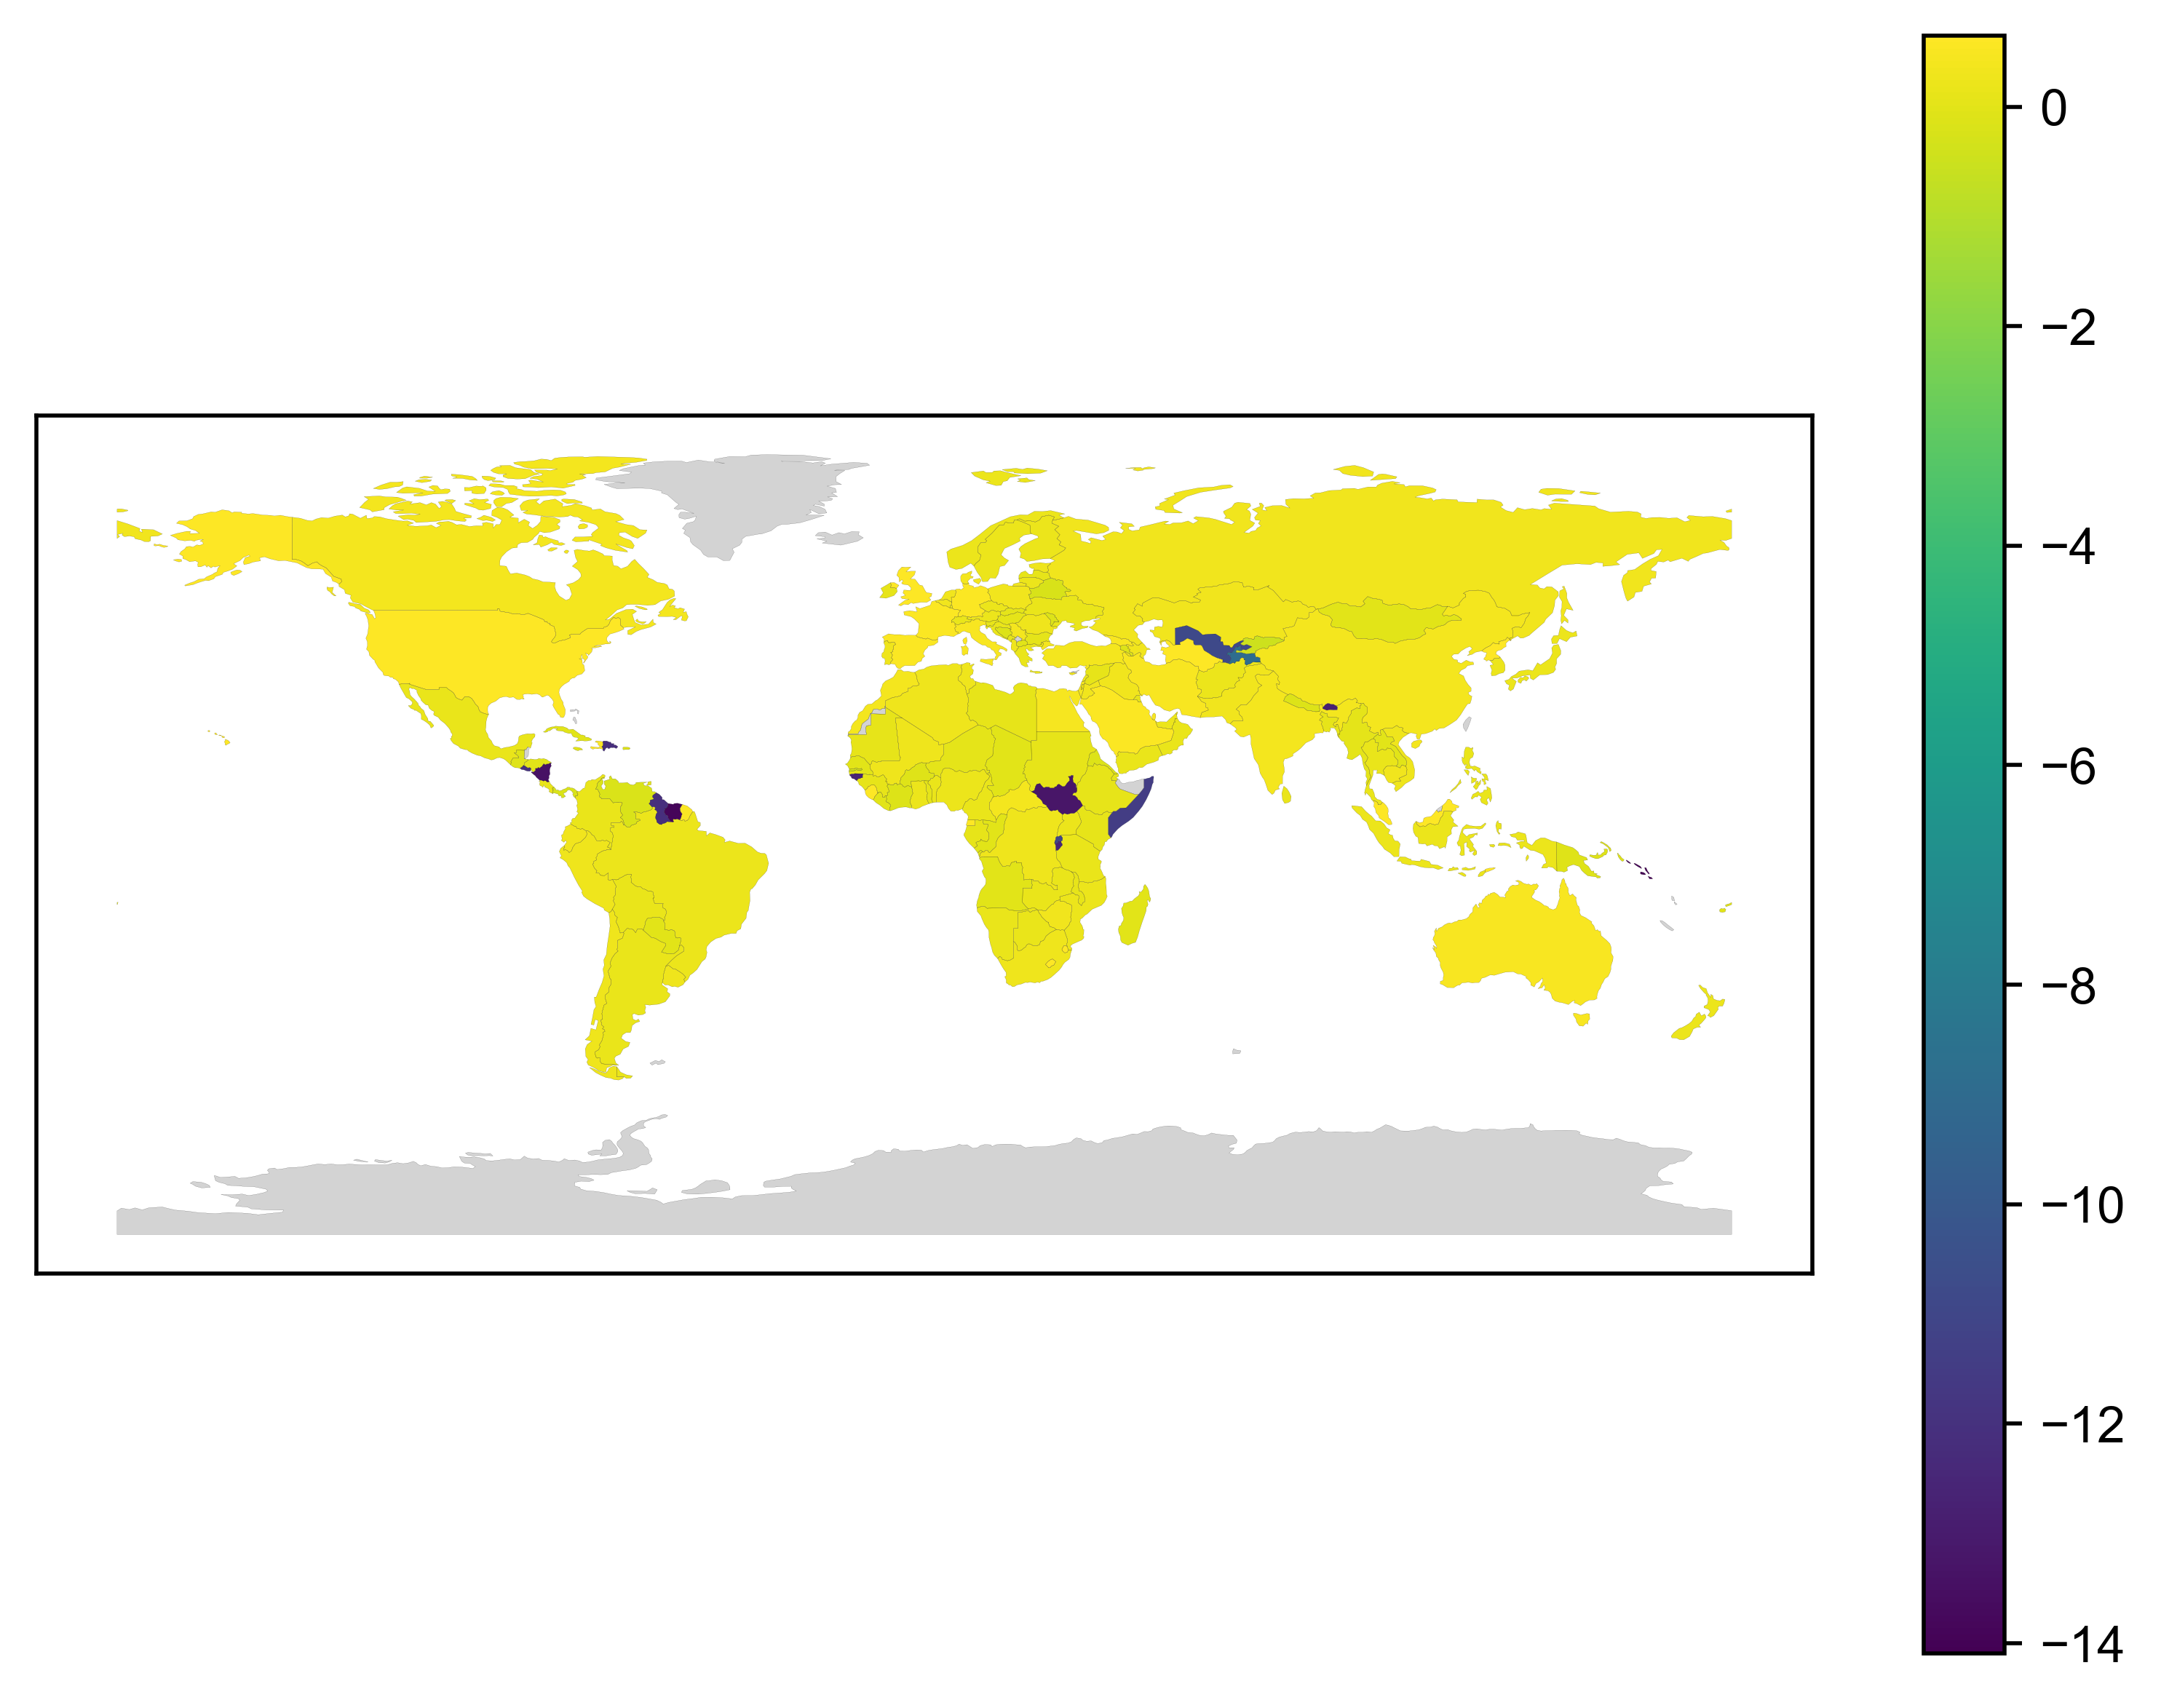

In [282]:
fig, ax4 = plt.subplots(nrows=1, ncols=1, dpi=500)

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
new_df['Aff_country'] = new_df['Aff_country'].apply(lambda x: x.upper())

# Merge your data with the world map
world = world.merge(new_df, left_on='iso_a3', right_on='Aff_country', how='left')

# Plot the map
world.boundary.plot(ax=ax4, color='k', linewidth=0.02)
plot = world.plot(column='relative_difference', ax=ax4,
                 missing_kwds={'color': 'lightgrey'},
                 legend=True,  # Add this to show the colorbar
           )  # You can change to 'horizontal' if preferred

ax4.set_xticks([])
ax4.set_yticks([])
plt.tight_layout()

In [95]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

fig, ax4 = plt.subplots(nrows=1, ncols=1, dpi=500)

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
new_df['Aff_country'] = new_df['Aff_country'].apply(lambda x: x.upper())

# Merge your data with the world map
world = world.merge(new_df, left_on='iso_a3', right_on='Aff_country', how='left')

# Create the base map with colors
world.boundary.plot(ax=ax4, color='k', linewidth=0.02)
plot = world.plot(column='Rank_inertia', ax=ax4,
                 missing_kwds={'color': 'lightgrey'},
                 legend=True)

# Add hatches based on another column
# Assuming your second column is called 'second_variable'
# First, create hatch patterns based on your criteria
def assign_hatch(value):
    if pd.isna(value):
        return ''
    elif value > 75:  # Adjust these thresholds as needed
        return '\\\\'
    elif value > 50:
        return '//'
    elif value > 25:
        return 'xx'
    else:
        return '.'

# Apply hatches to the polygons
for idx, row in world.iterrows():
    poly = world.geometry.iloc[idx]
    if not pd.isna(row['second_variable']):  # Replace with your column name
        hatch = assign_hatch(row['second_variable'])
        ax4.add_patch(plt.Polygon(poly.exterior.coords, 
                                fill=False,
                                hatch=hatch,
                                alpha=0.5))

# Remove axes
ax4.set_xticks([])
ax4.set_yticks([])

# Add a legend for hatches
from matplotlib.patches import Patch
hatch_legend_elements = [
    Patch(facecolor='none', hatch='\\\\', label='> 75%'),
    Patch(facecolor='none', hatch='//', label='50-75%'),
    Patch(facecolor='none', hatch='xx', label='25-50%'),
    Patch(facecolor='none', hatch='.', label='< 25%')
]

# Create two legends: one for colors, one for hatches
first_legend = ax4.get_legend()
ax4.legend(handles=hatch_legend_elements, 
          title='Second Variable',
          loc='lower left')
first_legend.set_title('Rank Inertia')

plt.tight_layout()
plt.show()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Aff_country,count_before,target_count_before,cdf_before,count_after,target_count_after,cdf_after,difference,relative_difference,dif_count,difference_count,Before_rank_regime,After_rank_regime,Rank_inertia
146,3720382.0,Asia,Georgia,GEO,17477,"POLYGON ((39.95501 43.43500, 40.07696 43.55310...",GEO,272.235538,0.001111,0.006061,965.610862,0.915087,0.585106,0.579046,0.582577,0.913975,693.375324,True,False,- +
66,4745185.0,Africa,Central African Rep.,CAF,2220,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...",CAF,63.986523,0.005351,0.054545,98.721651,0.354464,0.494681,0.440135,0.465528,0.349113,34.735128,True,True,- -
90,16486542.0,Asia,Cambodia,KHM,27089,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",KHM,235.347180,0.001279,0.018182,604.274362,0.171401,0.414894,0.396712,0.404058,0.170122,368.927182,True,True,- -
145,10023318.0,Asia,Azerbaijan,AZE,48047,"MULTIPOLYGON (((46.40495 41.86068, 46.68607 41...",AZE,217.685515,0.011642,0.090909,486.888053,0.291515,0.473404,0.382495,0.420745,0.279873,269.202538,True,True,- -
44,17373662.0,South America,Ecuador,ECU,107435,"POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...",ECU,423.801886,0.024284,0.151515,2237.649695,0.310005,0.489362,0.337847,0.398176,0.285721,1813.847810,True,True,- -


In [240]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2018']].dropna()
pop_df['2018']=pop_df['2018'].astype(int)
possible_countries=pop_df.query(" `2018` >=500000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

,Aff_country,count_before,target_count_before,count_after,target_count_after,cdf_after_world,cdf_before_world,cdf_after_target,cdf_before_target
198,ssd,1.000000,0.000000,20.370319,0.057143,0.198347,0.074380,0.293388,0.004132
48,com,6.229944,0.000000,14.112027,0.000000,0.181818,0.140496,0.004132,0.004132
175,prk,6.723189,0.000000,15.156021,0.000000,0.185950,0.152893,0.004132,0.004132
214,tls,8.144445,0.000000,36.336102,0.000000,0.243802,0.165289,0.004132,0.004132
196,som,8.469802,0.000000,34.350913,0.416667,0.235537,0.169421,0.421488,0.004132
...,...,...,...,...,...,...,...,...,...
111,jpn,43025.204162,173.960032,57904.448597,250.429606,0.966942,0.983471,0.938017,0.966942
13,aus,45616.785259,120.139807,85024.225170,363.820537,0.987603,0.987603,0.962810,0.942149
41,chn,65809.251833,92.231095,206875.988561,240.407723,0.995868,0.991736,0.933884,0.933884
78,gbr,85661.484921,851.167062,132245.319065,1748.048189,0.991736,0.995868,0.995868,0.991736
